# Home Assignment 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # enable showing all columns of the df

## 1. Data pre-processing

### 1.1 Prepare the data

In [2]:
df = pd.read_csv("Postures.csv")
print(f'DF shape: {df.shape}')
df.head()

DF shape: (78096, 38)


,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,68.9079249764243,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,11.2506481750465,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?


Eliminate the first row, as it has only zeroes

In [3]:
df.drop(index=0, inplace=True)

In [4]:
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,68.9079249764243,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,11.2506481750465,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.3687480605765,67.9012603746826,-72.4446499648169,61.2754021959714,10.8411094568665,-69.2799064015993,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?


In [5]:
df['Class'].value_counts().to_frame().T # the dataset is fairly balanced

,3,1,5,2,4
Class,16344,16265,15733,14978,14775


Mark missing data as NaN so it is easier to handle and select numeric values:

In [6]:
df.replace('?', np.nan, inplace=True)
df.iloc[:, 2:] = df.iloc[:,2:].apply(pd.to_numeric, errors='coerce')

# Selecting the numerical columns (excluding 'Class', and 'User')
num_cols_sample =df.iloc[:,2:]

Data distribution:

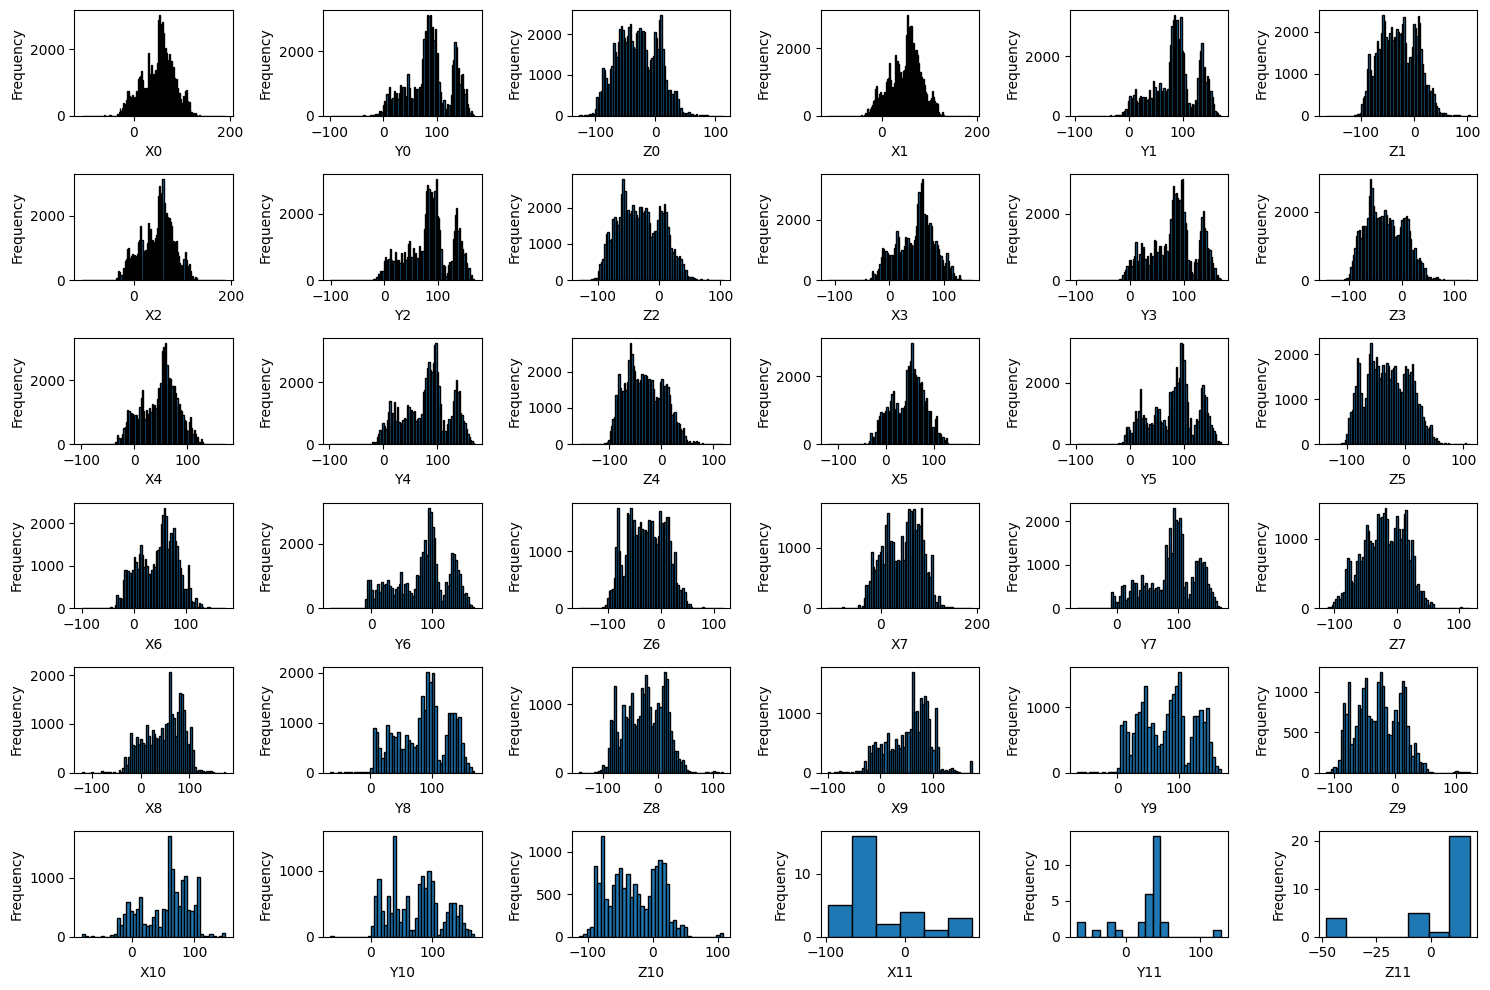

In [7]:
# Using the previously cleaned data (df) to generate the subplot grid of histograms
# Selecting numerical columns (assuming all columns from 3rd onward are numerical)
num_cols_sample = df.iloc[:, 2:]

# Number of rows and columns for subplots
num_rows = 6
num_columns = 6

# Creating a subplot grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))

# Iterating over the columns and plotting histograms
for i, column in enumerate(num_cols_sample.columns):
    row_idx = i // num_columns
    col_idx = i % num_columns

    # Plotting the histogram in the appropriate subplot
    # Dropping NaN values for the histogram
    axes[row_idx, col_idx].hist(num_cols_sample[column].dropna(), bins='auto', edgecolor='black')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Frequency')

# Adjusting layout for better visibility
plt.tight_layout()
plt.show()

As we can see all the variables have Gaussian distribution so no transformations are required for any variables.

Split the data into training and testing sets:

In [8]:
X, y = df.drop(columns='Class'), df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 1.2 Data Transformation and Encoding

Convert the data type of all columns (excluding 'User') to Float64. Using Float64 allows for NaN values, facilitating smoother data scaling processes.

In [9]:
columns_to_update_dtype = list(X_train.columns)
columns_to_update_dtype.remove('User')

X_train[columns_to_update_dtype] = X_train[columns_to_update_dtype].astype(dtype='Float64')
X_test[columns_to_update_dtype] = X_test[columns_to_update_dtype].astype(dtype='Float64')

Changing the 'User' column to a categorical data type and performing one-hot encoding is done to treat 'User' as a categorical variable rather than numerical. This avoids misleading ordinal assumptions. By performing one-hot encoding after splitting the dataset, we ensure consistency in encoding across training and testing sets, preventing potential data leakage and aligning with best practices.

In [10]:
# Number of instances per user
df['User'].value_counts().sort_index().to_frame().T

,0,1,2,4,5,6,7,8,9,10,11,12,13,14
User,9048,4717,4513,379,5105,4377,492,6811,3920,9573,8061,4865,8739,7495


In [11]:
# Type of data in column User
df['User'].dtype

dtype('int64')

In [12]:
# Convert the User column to a categorical column (in X_train and X_test)
X_train['User'] = X_train['User'].astype('category')
X_test['User'] = X_test['User'].astype('category')

# One-hot encode the User column (in X_train and X_test)
X_train = pd.get_dummies(X_train, columns=['User'], prefix='User')
X_test = pd.get_dummies(X_test, columns=['User'], prefix='User')

Finding if there are any outliers in the data and removing them if needed can be done using the boxplot. The boxplot shows that there are no outliers in the data.

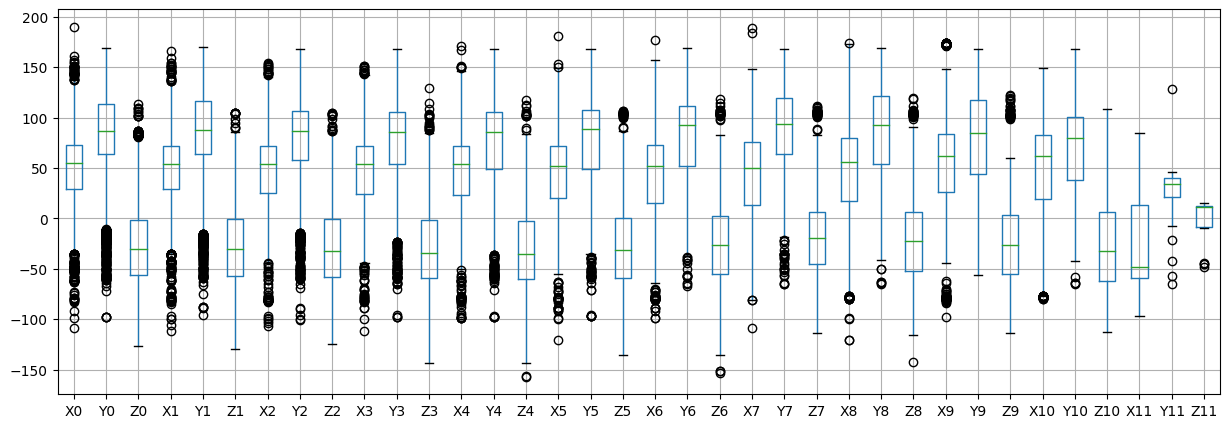

In [13]:
# Finding outliers - Boxplot of the columns except the last 14 (the User columns)
X_train.iloc[:, :-14].boxplot(figsize=(15, 5))
plt.show()

Dimensionality Reduction can be considered to reduce the number of features in the dataset. This can be done using PCA or LDA. However, since the number of features is already small, we will not be performing dimensionality reduction.

### 1.3 Data Scaling

To ensure the best performance of models, we will test two different scaling approaches: min-max and standartisation. 

In [14]:
## MINMAX
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
# transform training data
X_train_norm = pd.DataFrame(norm.transform(X_train), columns=X_train.columns)
# transform testing data
X_test_norm = pd.DataFrame(norm.transform(X_test), columns=X_test.columns)

## STANDARTISATION  standardisation
# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
# numerical features
num_cols = df.iloc[:, 2:]

# apply standardization on numerical features
for i in num_cols:
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

### 1.4 Handle missing values

In [15]:
def display_percentage_of_missing_values(X):
    missing_values_percentage = (X.isna().mean() * 100).round(2).astype(str) + '%'
    return missing_values_percentage.to_frame().T

In [16]:
# Percentage of missing values in each column in the training set
display_percentage_of_missing_values(X_train)

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11,User_0,User_1,User_2,User_4,User_5,User_6,User_7,User_8,User_9,User_10,User_11,User_12,User_13,User_14
0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.88%,0.88%,0.88%,4.07%,4.07%,4.07%,16.78%,16.78%,16.78%,33.19%,33.19%,33.19%,50.09%,50.09%,50.09%,60.86%,60.86%,60.86%,69.28%,69.28%,69.28%,81.04%,81.04%,81.04%,99.96%,99.96%,99.96%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


In [17]:
# all instances lacking values for X3 were also missing all other values in subsequnet columns
display_percentage_of_missing_values(X_train[X_train['X3'].isna()])

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11,User_0,User_1,User_2,User_4,User_5,User_6,User_7,User_8,User_9,User_10,User_11,User_12,User_13,User_14
0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


In [18]:
# all instances lacking values for X4 were also missing all other values in subsequnet columns
X_tmp = X_train.dropna(subset=['X3'])
display_percentage_of_missing_values(X_tmp[X_tmp['X4'].isna()])

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11,User_0,User_1,User_2,User_4,User_5,User_6,User_7,User_8,User_9,User_10,User_11,User_12,User_13,User_14
0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


We initially examined the columns `X3`, `Y3`, and `Z3`, each of which had a minimal percentage of missing values (<1%). We analysed all the rows where `X3` values were missing. We discovered that all instances lacking values for X3 were also missing all other values in subsequnet columns. 

We observed the same trend in the following columns. For each subsequent column all the rows with missing values were also missing values for all subsequent columns.
Eventually, we decided to impute missing values accordingly:
- for columns [X,Y,Z] 3 and 4 - delete the rows with missing values, as they have most of the attribute values missing and account for a small percentage of data (4%).
- for the columns [X,Y,Z] 5, 6, 7, 8, 9, 10  - impute with median values or with knn predictions
- for columns [X,Y,Z] 11 - remove those columns, as they have almost all values missing (99.96%)

In [19]:
def generate_column_names(column_indices):
    return np.array([[f'X{i}',f'Y{i}',f'Z{i}'] for i in column_indices]).flatten().tolist()


class MissingDataImputer:
    def __init__(self, 
                columns_to_drop_rows_if_missing_value=[],
                columns_to_impute_with_median=[],
                columns_to_impute_with_knn=[],
                columns_to_drop=[]):
        self.columns_to_drop_rows_if_missing_value = generate_column_names(columns_to_drop_rows_if_missing_value)
        self.columns_to_impute_with_median = generate_column_names(columns_to_impute_with_median)
        self.columns_to_impute_with_knn = generate_column_names(columns_to_impute_with_knn)
        self.columns_to_drop = generate_column_names(columns_to_drop)

    def impute(self, X, y):
        X, y = X.copy(), y.copy()

        # Drop rows for which the values in specified columns are missing
        if self.columns_to_drop_rows_if_missing_value:
            X.reset_index(drop=True, inplace=True)
            y.reset_index(drop=True, inplace=True)
            X = X.dropna(subset=self.columns_to_drop_rows_if_missing_value)
            y = y.loc[X.index] # leave only the relevant rows in y

        # Impute specified columns with median
        if self.columns_to_impute_with_median:
            median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
            X[self.columns_to_impute_with_median] = median_imputer.fit_transform(X[self.columns_to_impute_with_median])

        # Impute specified columns with knn
        if self.columns_to_impute_with_knn:
            knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
            X[self.columns_to_impute_with_knn] = knn_imputer.fit_transform(X[self.columns_to_impute_with_knn])

        # Drop specified columns
        if self.columns_to_drop:
            X = X.drop(columns=self.columns_to_drop)
        
        return X, y


## 2. Classification

Conducting an initial analysis with baseline models to gain insights into the most effective preprocessing techniques for each specific model.

In [42]:
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'NaiveBayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    }

scaling_methods = {
    'MinMax': [X_train_norm, y_train, X_test_norm, y_test],
    'Standardization': [X_train_stand, y_train, X_test_stand, y_test],
}

imputers = {
    'Median': MissingDataImputer(
        columns_to_impute_with_median=[3,4,5,6,7,8,9,10],
        columns_to_drop=[11]),
    'Median+drop_rows': MissingDataImputer(
        columns_to_drop_rows_if_missing_value=[3,4],
        columns_to_impute_with_median=[5,6,7,8,9,10],
        columns_to_drop=[11]),
    'Medain+drop_cols': MissingDataImputer(
        columns_to_impute_with_median=[3,4,5,6,7],
        columns_to_drop=[8,9,10,11]),
    'KNN+drop_rows+drop_cols': MissingDataImputer(
        columns_to_drop_rows_if_missing_value=[3,4],
        columns_to_impute_with_knn=[5,6,7],
        columns_to_drop=[8,9,10,11]),
    }

results_df_2 = pd.DataFrame(columns=['Model', 'Scaling', 'Imputation', 'Accuracy'])


for scaling_name, scaled_data in scaling_methods.items():
    X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled = scaled_data

    for imputer_name, imputer in imputers.items():
        X_train_imputed, y_train_imputed = imputer.impute(X_train_scaled, y_train_scaled)
        X_test_imputed, y_test_imputed = imputer.impute(X_test_scaled, y_test_scaled)

        for model_name, model in models.items():
            model.fit(X_train_imputed, y_train_imputed)
            y_pred = model.predict(X_test_imputed)

            accuracy = round(accuracy_score(y_test_imputed, y_pred), 4)
            results_df_2.loc[len(results_df_2)] = [model_name, scaling_name, imputer_name, accuracy]
            # print(model_name, scaling_name, imputer_name, accuracy) I don't think we need this line
            
results_df_2.sort_values(by=['Accuracy'], ascending=False)

LogisticRegression MinMax Median 0.7345
DecisionTree MinMax Median 0.3737
NaiveBayes MinMax Median 0.541
KNN MinMax Median 0.9409
LogisticRegression MinMax Median+drop_rows 0.7352
DecisionTree MinMax Median+drop_rows 0.4454
NaiveBayes MinMax Median+drop_rows 0.539
KNN MinMax Median+drop_rows 0.9369
LogisticRegression MinMax Medain+drop_cols 0.7297
DecisionTree MinMax Medain+drop_cols 0.5597
NaiveBayes MinMax Medain+drop_cols 0.6167
KNN MinMax Medain+drop_cols 0.9325
LogisticRegression MinMax KNN+drop_rows+drop_cols 0.7369
DecisionTree MinMax KNN+drop_rows+drop_cols 0.9032
NaiveBayes MinMax KNN+drop_rows+drop_cols 0.7108
KNN MinMax KNN+drop_rows+drop_cols 0.9262
LogisticRegression Standardization Median 0.7677
DecisionTree Standardization Median 0.3737
NaiveBayes Standardization Median 0.541
KNN Standardization Median 0.9369
LogisticRegression Standardization Median+drop_rows 0.7751
DecisionTree Standardization Median+drop_rows 0.4454
NaiveBayes Standardization Median+drop_rows 0.539
KN

,Model,Scaling,Imputation,Accuracy
3,KNN,MinMax,Median,0.9409
7,KNN,MinMax,Median+drop_rows,0.9369
19,KNN,Standardization,Median,0.9369
27,KNN,Standardization,Medain+drop_cols,0.9337
11,KNN,MinMax,Medain+drop_cols,0.9325
23,KNN,Standardization,Median+drop_rows,0.9312
31,KNN,Standardization,KNN+drop_rows+drop_cols,0.9292
15,KNN,MinMax,KNN+drop_rows+drop_cols,0.9262
13,DecisionTree,MinMax,KNN+drop_rows+drop_cols,0.9032
29,DecisionTree,Standardization,KNN+drop_rows+drop_cols,0.8955


- We can see that the KNN perform significantly better than all the other models independently from the normalization and imputation method (always over 90%), LogisticRegression also performs quite decent (up to 77%). However, the DecisionTree performs even better, given that we use the `KNN+drop_rows+drop_cols` imputation method.
- The imputation type has a slight influence on the score of KNN and LogisticRegression (Median or Median+drop_rows perform the best). However, for the DecisionTree selecting the `KNN+drop_rows+drop_cols` imputation method is a critical step (it reaches 90% accuracy). For all the remaining imputation methods it performs very poorly (~50%). For NaiveBayes `KNN+drop_rows+drop_cols`  also turns out to be significantly better than other methods.
- Both types of data scaling seem to be quite comparable. However, for KNN `MinMax` slightly dominates, and for LogisticRegression `Standardization`. As expected, scaling method does not affect performance of DecisionTree and NaiveBayes.

## 3. Optimizing models performance

In [20]:
# Empty dataFrame that will have all the results - to be printed at the end
results_hyperparam = pd.DataFrame(columns=['Model', 'Accuracy'])

3.1 Logistic regression - using standartization scaling and Median+drop_rows imputation

In [23]:
# Logistic regression - Hyperparameter tuning 

# Data with "Standardization scaling" and "Median + drop rows" imputation
imputer = MissingDataImputer(
    columns_to_drop_rows_if_missing_value=[3, 4],
    columns_to_impute_with_median=[5, 6, 7, 8, 9, 10],
    columns_to_drop=[11]
)

X_train_imputed, y_train_imputed = imputer.impute(X_train_stand, y_train)
X_test_imputed, y_test_imputed = imputer.impute(X_test_stand, y_test)

# Hyperparameter tuning
model = LogisticRegression(random_state=42)

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], # Penalty 
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_imputed, y_train_imputed)

# Best hyperparameters
grid_search.best_params_

# Best model
best_model = grid_search.best_estimator_

# Accuracy on the test set
y_pred = best_model.predict(X_test_imputed)
accuracy = round(accuracy_score(y_test_imputed, y_pred), 4)
results_hyperparam.loc[len(results_hyperparam)] = ['LogisticRegression', accuracy]
print(f'Accuracy of the best model: {accuracy}')



Fitting 5 folds for each of 560 candidates, totalling 2800 fits


3.2 Naive Bayes - using MinMax scaling and KNN+drop_rows+drop_cols imputation

In [25]:
# Naive Bayes - Hyperparameter tuning   

# Data with "MinMax scaling" and "KNN + drop rows + drop_cols" imputation
imputer = MissingDataImputer(
        columns_to_drop_rows_if_missing_value=[3,4],
        columns_to_impute_with_knn=[5,6,7],
        columns_to_drop=[8,9,10,11]
        )

X_train_imputed, y_train_imputed = imputer.impute(X_train_norm, y_train)
X_test_imputed, y_test_imputed = imputer.impute(X_test_norm, y_test)

# Hyperparameter tuning
model = GaussianNB()

param_grid = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_imputed, y_train_imputed)

# Best hyperparameters & model
grid_search.best_params_
best_model = grid_search.best_estimator_

# Accuracy on the test set
y_pred = best_model.predict(X_test_imputed)
accuracy = round(accuracy_score(y_test_imputed, y_pred), 4)
results_hyperparam.loc[len(results_hyperparam)] = ['NaiveBayes', accuracy]
print(f'Accuracy of the best model: {accuracy}')


3.3 KNN - using MinMax scaling and median imputation

In [22]:
# KNN - Hyperparameter tuning

# Data with "MinMax scaling" and "Median" imputation
imputer = MissingDataImputer(
        columns_to_impute_with_median=[3,4,5,6,7,8,9,10],
        columns_to_drop=[11]
)

X_train_imputed, y_train_imputed = imputer.impute(X_train_norm, y_train)
X_test_imputed, y_test_imputed = imputer.impute(X_test_norm, y_test)

# Hyperparameter tuning
model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_imputed, y_train_imputed)

# Best hyperparameters & model
grid_search.best_params_
best_model = grid_search.best_estimator_

# Accuracy on the test set
y_pred = best_model.predict(X_test_imputed)
accuracy = round(accuracy_score(y_test_imputed, y_pred), 4)
results_hyperparam.loc[len(results_hyperparam)] = ['KNN', accuracy]
print(f'Accuracy of the best model: {accuracy}')

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Accuracy of the best model: 0.9795


3.4 Decision Tree - using MinMax scaling and KNN+drop_rows+drop_cols imputation

In [ ]:
#TODO Complete the code with appropriate X and y for used scaling and imputation. DONT RUN THIS CELL UNLESS THAT WAS DONE

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics for the best model
print(f"Best Model Accuracy: {accuracy}")
print(f"Best Model Confusion Matrix:\n{conf_matrix}")
print(f"Best Model Classification Report:\n{classification_rep}")


## 3. Results

In [ ]:
print(results_hyperparam)

  Model  Accuracy
0   KNN    0.9795
